<h1 style="color:green" align="center"> German Credit Risk Prediction using Random Forest Classifier </h1>

<b>Problem Statement</b>

<b>Credit Risk Prediction: </b>

This is a classic problem where the goal is to predict whether an individual's credit risk is "Good" or "Bad" based on the provided features. 

You could use various machine learning algorithms to build a predictive model that takes into account attributes like age, gender, job, housing, savings, checking account status, credit amount, duration, and purpose to predict the likelihood of a customer defaulting on a loan.

<b>Information about Dataset</b>

`Age` - The age of the individual. This is likely a numerical variable representing the age in years.

`Sex`- The gender of the individual. This is likely a categorical variable with values such as 'Male' and 'Female'.

`Job` - The occupation or job type of the individual. This is likely a categorical variable indicating the type of job or employment status.

`Housing` -The type of housing the individual has. This could be a categorical variable with values like 'Own', 'Rent', 'Free', indicating different housing arrangements.

`Saving accounts` - The status of the individual's saving accounts. This is likely a categorical variable representing the level of savings or financial status.

`Checking account` - The status of the individual's checking account. Similar to 'Saving accounts', this is likely a categorical variable representing the financial status of the checking account.

`Credit amount` - The amount of credit (loan) requested or obtained. This is a numerical variable indicating the monetary value.

`Duration` - The duration of the credit (loan) in months. This is a numerical variable representing the loan term.

`Purpose` - The purpose for which the credit (loan) is being requested. This is likely a categorical variable indicating the reason for obtaining the credit.

`Risk` - This column represents the risk associated with the credit (loan). It could be a categorical variable with values like 'Good' and 'Bad', indicating the creditworthiness of the individual.

<h2 style="color:blue" align="left"> 1. Import necessary Libraries </h2>

In [1]:
# Read Data
import numpy as np                     # For doing Numerical caluculation like mean, std, mode etc.,
import pandas as pd                    # for loading, reading and manipulation the data

# Visualization
import seaborn as sns                  # Visualization using seaborn
import matplotlib.pyplot as plt        # Visualization using matplotlib

# style
plt.style.use("fivethirtyeight")       # Set Graphs Background style using matplotlib
sns.set_style("darkgrid")              # Set Graphs Background style using seaborn

import warnings                        # Ignore Warnings
warnings.filterwarnings("ignore")

<h2 style="color:blue" align="left"> 2. Loading dataset </h2>

In [2]:
df = pd.read_csv('german_credit_data.csv')
print(f'First 5 rows \n{df.head()}')

First 5 rows 
   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad  


In [3]:
# checking dimension (num of rows and columns) of dataset
print("data shape (Rows, Columns):",df.shape)

data shape (Rows, Columns): (1000, 11)


In [4]:
#Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
#Priniting first 5 rows 
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
#Columns of the dataset
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

<h2 style="color:blue" align="left"> 3. EDA (Exploratory Data Analysis) </h2>

- EDA is a way of **Visualizing, Summarizing and interpreting** the information that is **hidden in rows and column** format.

- Find Unwanted Columns
- Find Missing Values
- Explore categorical Features
- Find Categorical Feature Distribution
- Relationship between Categorical Features and Label
- Explore Numerical Features
- Find Discrete Numerical Features
- Distribution of Discrete Numerical Features
- Relation between Discrete numerical Features and Labels
- Find Continous Numerical Features
- Distribution of Continous Numerical Features
- Relation between Continous numerical Features and Labels
- Find Outliers in numerical features
- Explore the Correlation between numerical features


<b> 1. Find Unwanted Columns </b>

`Unnamed: 0` is not significant in determining the Risk variable, hence dropping it.

In [7]:
df.drop(['Unnamed: 0'], inplace=True, axis=1)

<b> 2. Find Missing Values </b>

In [8]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

`Saving account` and `Checking account` has missing values, hence we will use mode imputation to fill na values

In [9]:
df['Saving accounts'].fillna(df['Saving accounts'].mode()[0], inplace=True)
df['Checking account'].fillna(df['Checking account'].mode()[0], inplace = True)

In [10]:
df.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

<b> 3. Explore categorical Features </b>

In [11]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']
categorical_features

['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

<b>4. Find Categorical Feature Distribution </b>

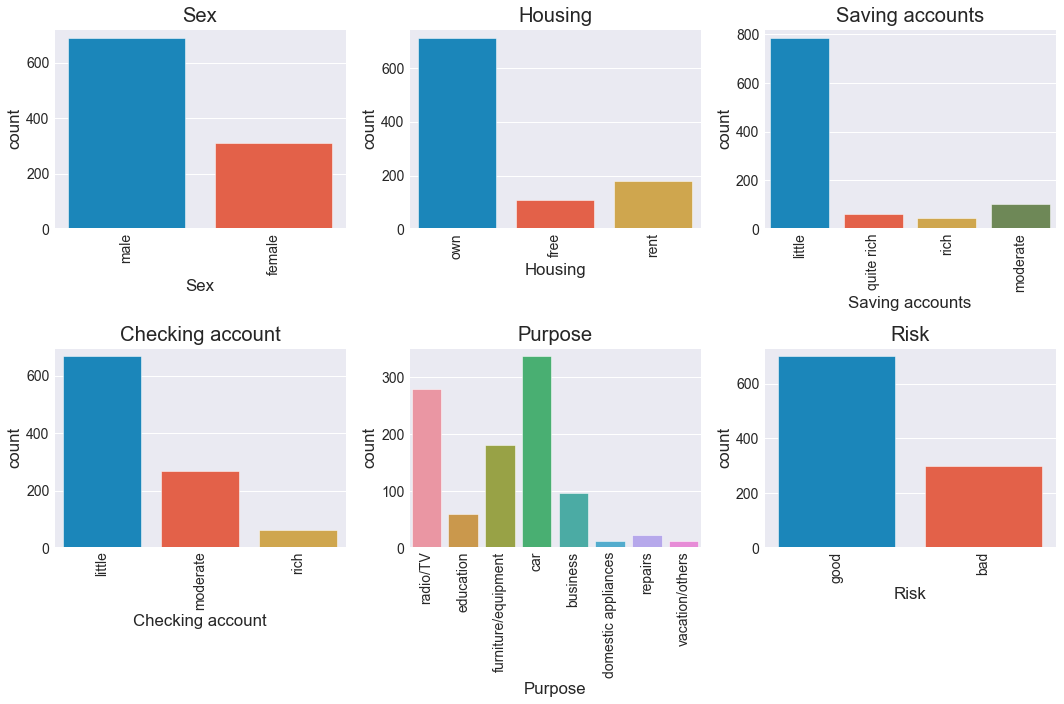

In [12]:
# Create a figure with subplots
num_cols = len(categorical_features)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for each categorical variable using Seaborn
for i, var in enumerate(categorical_features):
    sns.countplot(x=var, data=df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

<b> 5. Relationship between Categorical Features and Label </b>

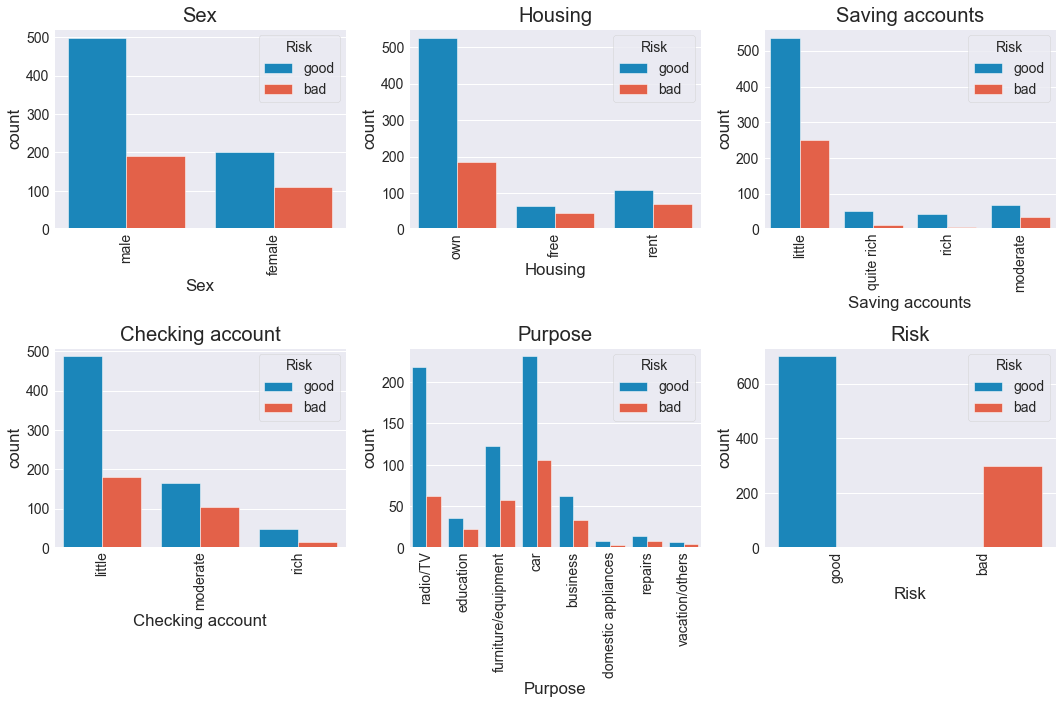

In [13]:
# Create a figure with subplots
num_cols = len(categorical_features)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for each categorical variable using Seaborn with 'Attrition' as hue
for i, var in enumerate(categorical_features):
    sns.countplot(x=var, hue='Risk', data=df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()


# Show plot
plt.show()

<b> 6. Explore Numerical Features </b>

In [14]:
numerical_features = df.select_dtypes(exclude='object')
numerical_features.columns

Index(['Age', 'Job', 'Credit amount', 'Duration'], dtype='object')

<b>7. Find Discrete Numerical Features</b>

In [15]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


<b>8. Distribution of Discrete Numerical Features</b>

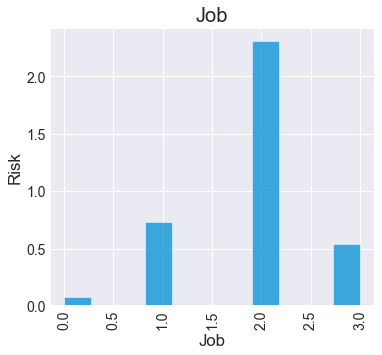

In [16]:
# Get the names of all columns with data type 'object' (categorical columns)
# cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create the stacked density plot
num_cols = len(discrete_feature)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

for i, var in enumerate(discrete_feature):
    sns.histplot(data=df, x=var, stat='density', multiple='stack', ax=axs[i])
    axs[i].set_title(var)
    axs[i].set_ylabel('Risk')
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

<b> 9. Relation between Discrete numerical Features and Labels </b>

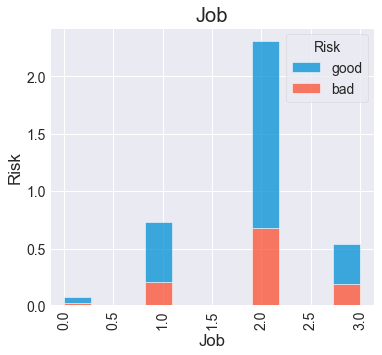

In [17]:
# Get the names of all columns with data type 'object' (categorical columns)
# cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create the stacked density plot
num_cols = len(discrete_feature)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

for i, var in enumerate(discrete_feature):
    sns.histplot(data=df, x=var, hue='Risk', stat='density', multiple='stack', ax=axs[i])
    axs[i].set_title(var)
    axs[i].set_ylabel('Risk')
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

<b> 10. Find Continous Numerical Features</b>

In [18]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 3


<b>11. Distribution of Continous Numerical Features</b>

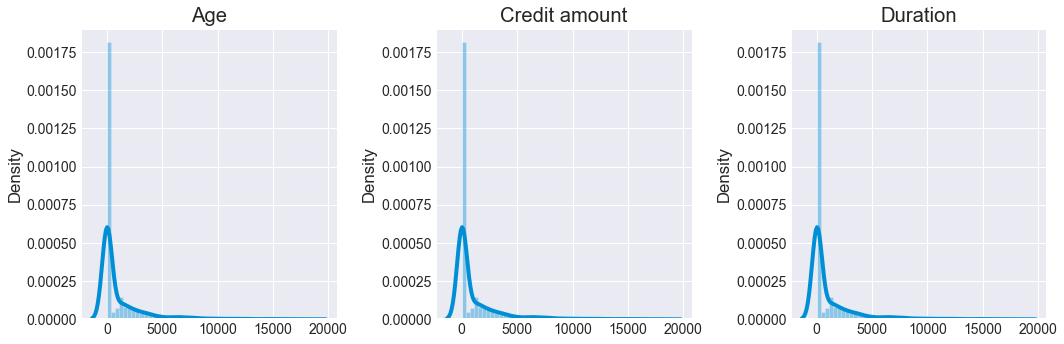

In [19]:
# Get the names of all columns with data type 'int'
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature]

# Create a figure with subplots
num_cols = len(continuous_features)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable with hue='Attrition'
for i, var in enumerate(continuous_features):
    #sns.distplot(df, x=var, kde=True, ax=axs[i])
    sns.distplot(df[continuous_features], kde=True, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

<b> 12. Relation between Continous numerical Features and Labels </b>

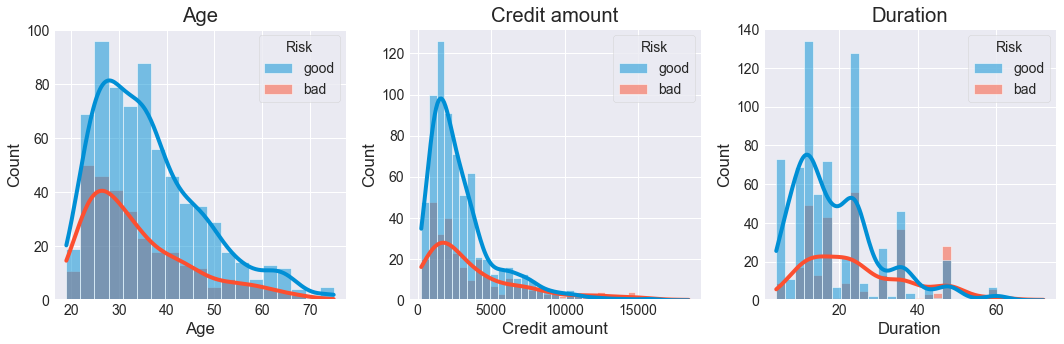

In [20]:
# Get the names of all columns with data type 'int'
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature]

# Create a figure with subplots
num_cols = len(continuous_features)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable with hue='Attrition'
for i, var in enumerate(continuous_features):
    sns.histplot(data=df, x=var, hue='Risk', kde=True, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

<b> 13. Find Outliers in numerical features </b>

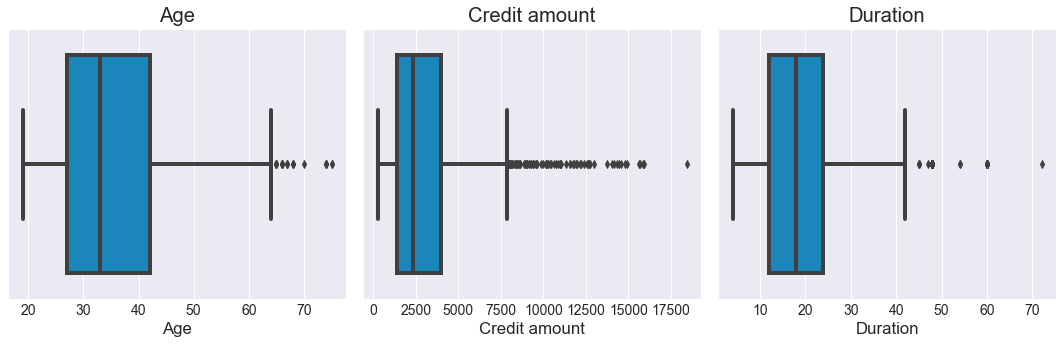

In [21]:
# Get the names of all columns with data type 'int'
num_vars = [feature for feature in numerical_features if feature not in discrete_feature]

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn
for i, var in enumerate(num_vars):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

<b> 14. Explore the Correlation between numerical features </b>

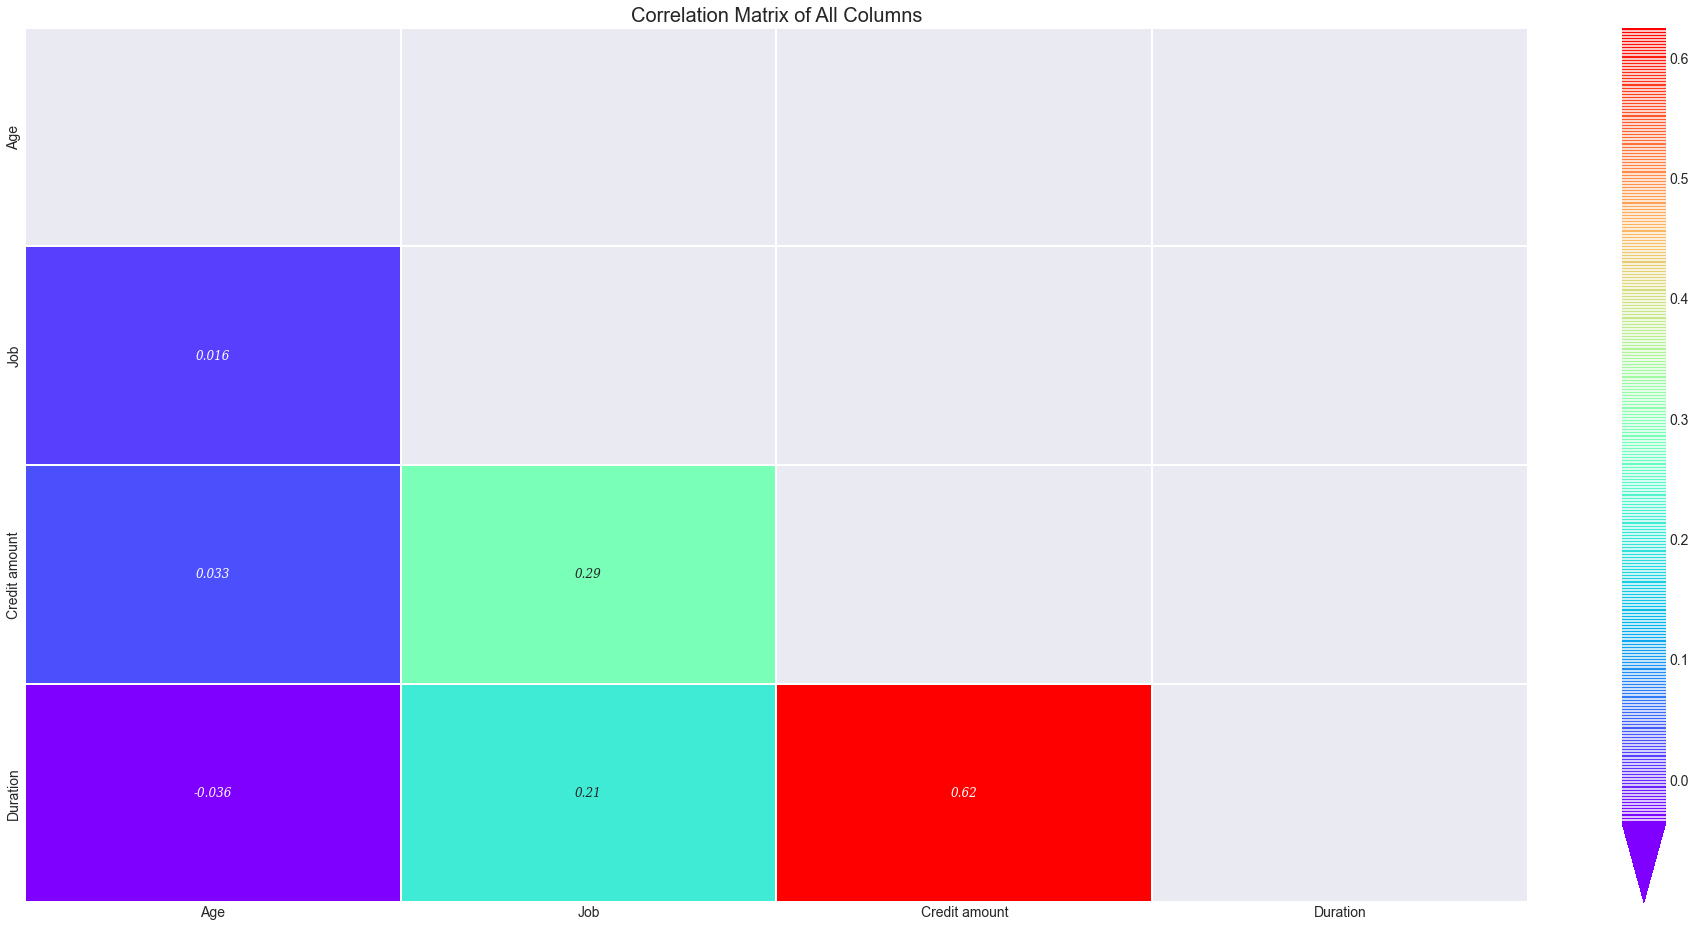

In [22]:
# Define the figure size
plt.figure(figsize = (30,15))

# Cutomize the annot
annot_kws={'fontsize':12,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


# Customize the cbar
cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

# take upper correlation matrix
matrix = np.triu(df.corr())

# Generate heatmap correlation
ax = sns.heatmap(df.corr(), mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Matrix of All Columns', fontsize = 20)

# Set the size of text
sns.set(font_scale = 1.2)

All the numericals columns are lessly correlated, no need to drop any columns

<h2 style="color:blue" align="left"> 4. Descriptive Statistics  </h2>

In [23]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


<h2 style="color:blue" align="left"> 5. Data Visualization </h2>

### 1. Categorical

- Categorical data :


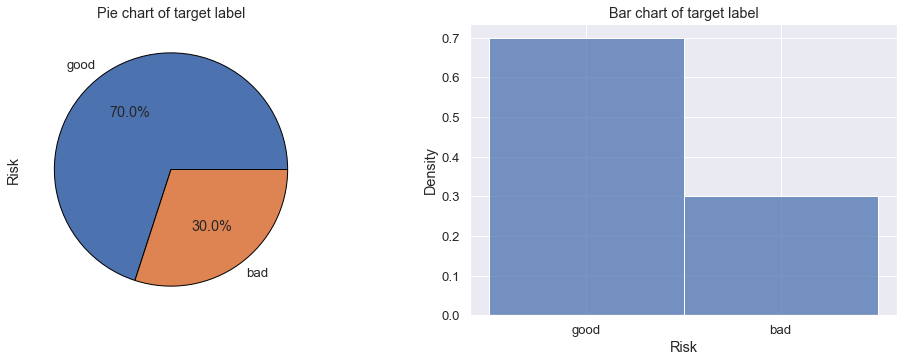

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
df['Risk'].value_counts().plot(kind='pie',wedgeprops={'edgecolor':'black'},autopct='%4.1f%%' )
plt.title('Pie chart of target label')


plt.subplot(1,2,2)
sns.histplot(data = df, x='Risk', stat='density') 
plt.title('Bar chart of target label')

plt.show()

Only 30% customer data is bad, there is chances of leaving credit card

### 2. Univariate Analysis

- Univariate Analysis : data consists of **only one variable (only x value)**.


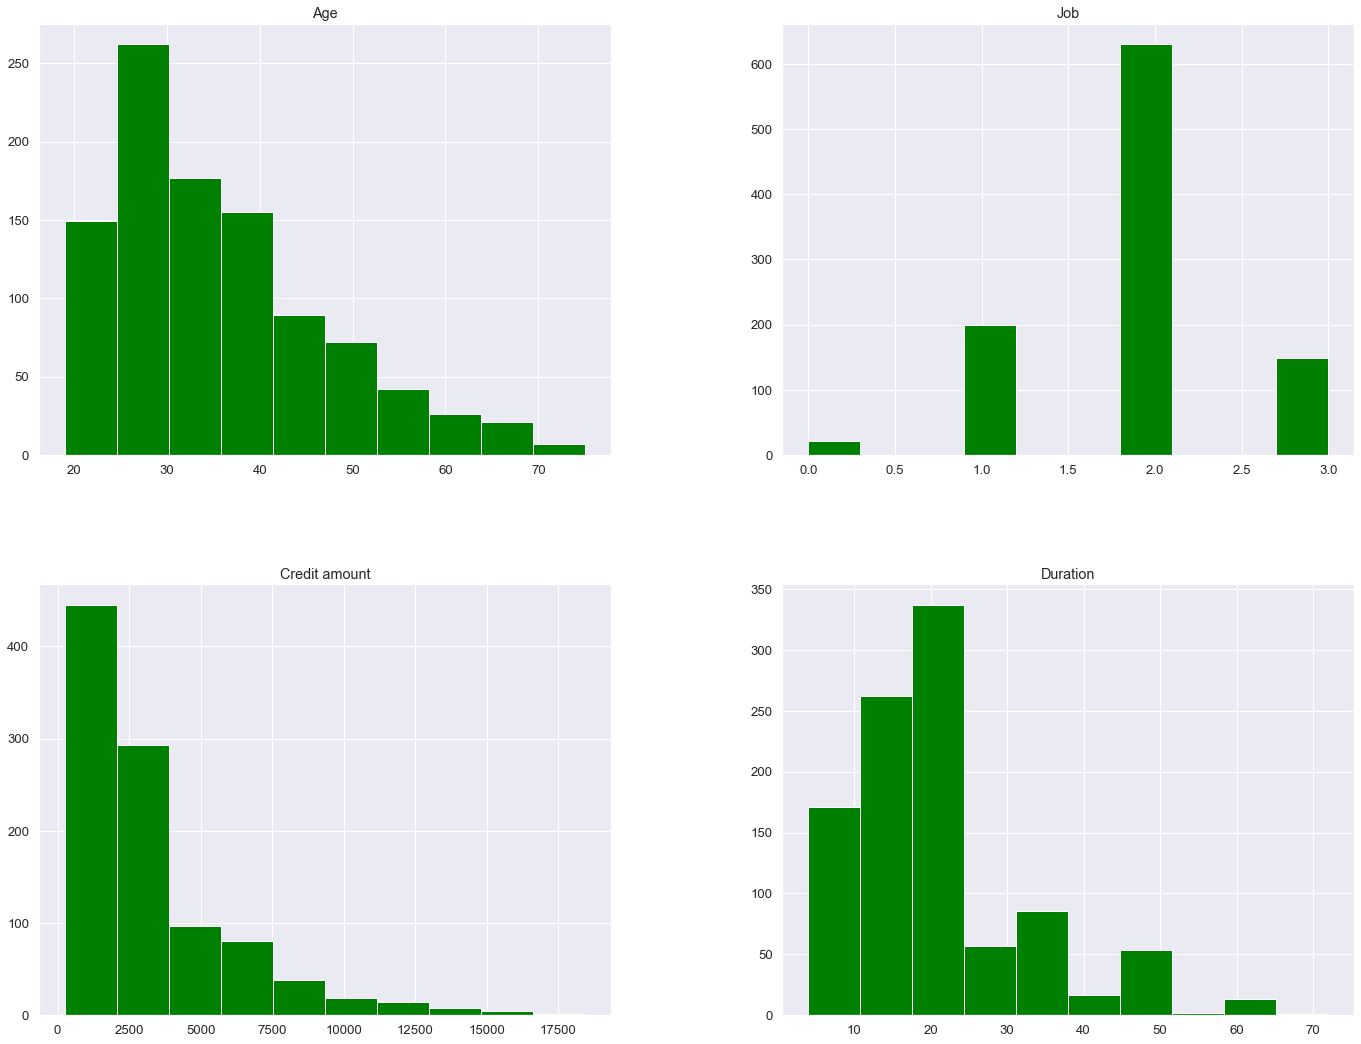

In [25]:
#Histogram of numerical Variables
df.hist(figsize=(21,17), color=['green'])
plt.show()

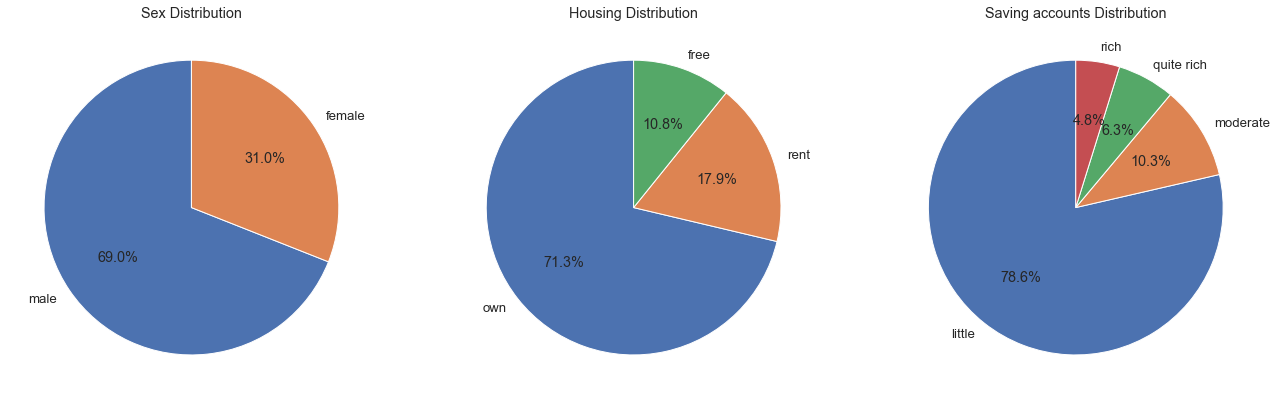

In [26]:
# Create a figure with subplots

fig, axs = plt.subplots(nrows= 1, ncols=3, figsize=(20,24))

# Create a pie chart for each categorical variable
for i, var in enumerate(categorical_features):
    if i < len(axs.flat):
        
        # Count the number of occurrences for each category
        categorical_features = df[var].value_counts()
        
        # Create a pie chart
        axs.flat[i].pie(categorical_features, labels=categorical_features.index, autopct='%1.1f%%', startangle=90)
        
        # set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')


# show plot
plt.show()

<b> Infernce </b>
- 69% customers who use credit card are men
- 71% customers has own house
- 78.6% has liitle saving account, rich and quite rich are very less. Only 10% moderate 

### 3. Bivariate Analysis

- **Bivariate Analysis** : data involves **two different variables**.


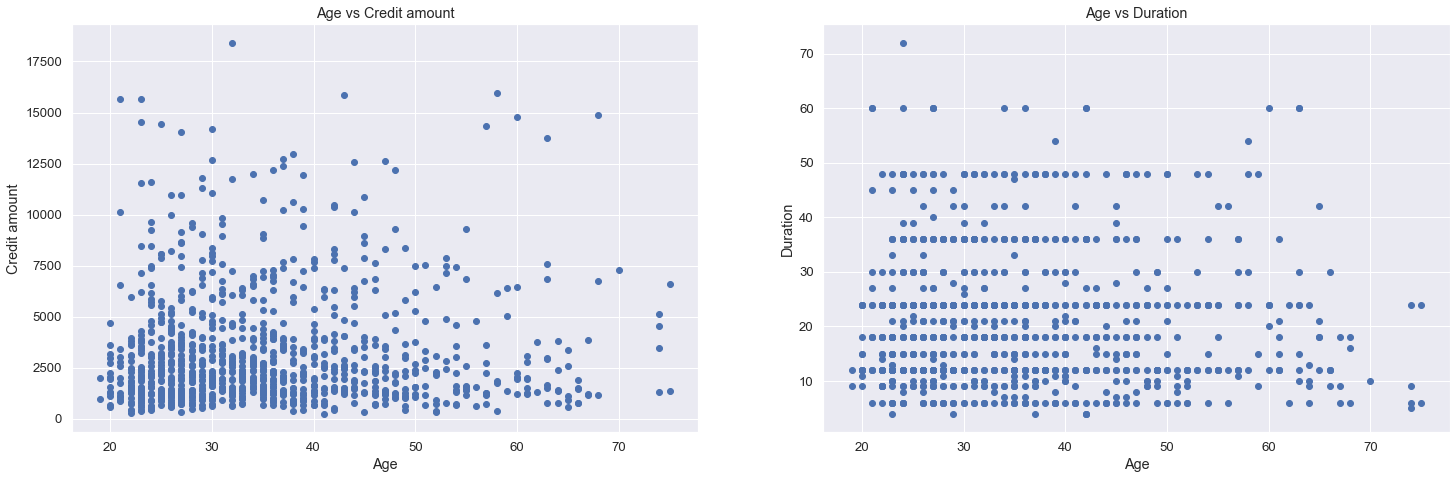

In [27]:
plt.figure(figsize=(22,7))

plt.subplot(1,2,1)
plt.scatter(df['Age'], df['Credit amount'])
plt.title('Age vs Credit amount')
plt.xlabel('Age')
plt.ylabel('Credit amount')


plt.subplot(1,2,2)
plt.scatter(df['Age'], df['Duration'])
plt.title('Age vs Duration')
plt.xlabel('Age')
plt.ylabel('Duration')

plt.show()

<b> Inference </b>
- No any significance, data distributed uniformly

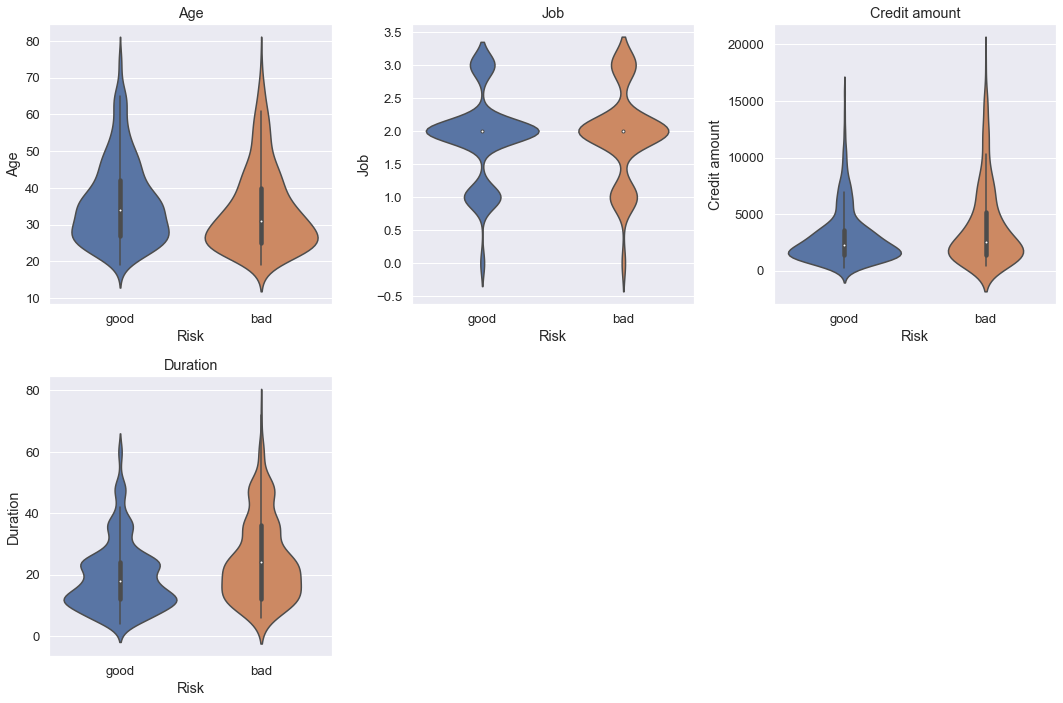

In [28]:
# Create a figure with subplots
int_vars = df.select_dtypes(include='int').columns.tolist()

num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a violin plot for each integer variable using Seaborn
for i, var in enumerate(int_vars):
    if i < len(axs):
        sns.violinplot(x='Risk', y=var, data=df, ax=axs[i])
        axs[i].set_title(var)
    else:
        break

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

### 4. Multivariate Analysis

- **Multivariate Analysis** : data involves **multiple different variables**.


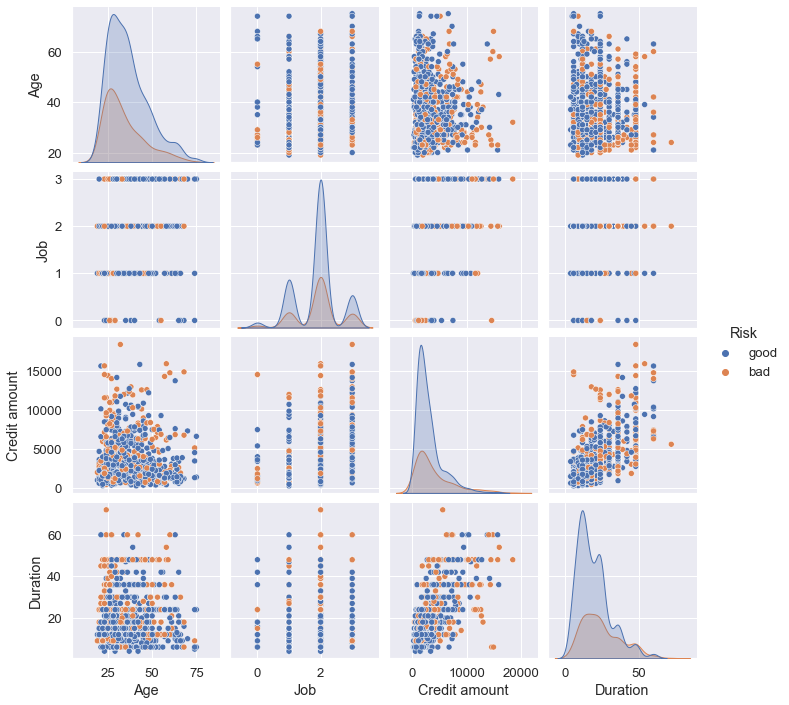

In [29]:
sns.pairplot(df, hue='Risk')
plt.show()

<h2 style="color:blue" align="left"> 6. Detect outliers using IQR </h2>

In [30]:
df.shape

(1000, 10)

In [31]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['Age','Credit amount','Duration']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(df[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
df = df.drop(df.index[outlier_indices])

In [32]:
df.shape

(958, 10)

We have dropped outliers from the dataset

<h2 style="color:blue" align="left"> 7. Check & Reduce Skewness </h2>

- Skewness tells us about the symmetry in a distribution.

* If the **skewness** is **between -0.5 to +0.5** then we can say data is **fairly symmetrical**.
  
* If the **skewness** is **between -1 to -0.5 or 0.5 to 1** then data is **moderately skewed**.
  
* If the **skewness** is **less than -1 and greater than +1** then our data is **heavily skewed**.

In [33]:
df.skew()

Age              0.923534
Job             -0.380223
Credit amount    1.496725
Duration         0.905614
dtype: float64

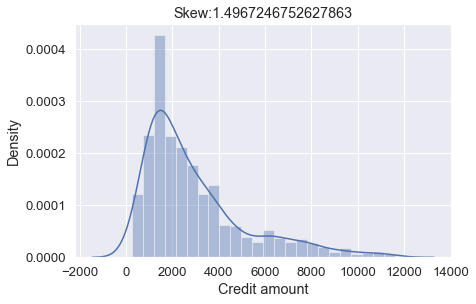

In [34]:
# Checking Skewness for feature "Credit amount"
sns.distplot(df['Credit amount'])
Skew_Credit_amount = df['Credit amount'].skew()
plt.title("Skew:"+str(Skew_Credit_amount))
plt.show()

Text(0.5, 1.0, 'Skew:0.001964383375913553')

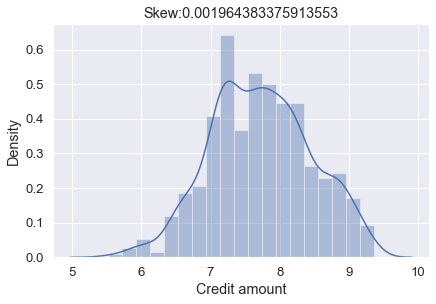

In [35]:
# Credit amount right skewed; log transform)
sns.distplot(np.log(df['Credit amount']+1))
Skew_Credit_amount_Log = np.log(df['Credit amount']+1).skew()
plt.title("Skew:"+str(Skew_Credit_amount_Log))

In [36]:
df['Credit amount'] = np.log(df['Credit amount'] + 1)

In [37]:
df.skew()

Age              0.923534
Job             -0.380223
Credit amount    0.001964
Duration         0.905614
dtype: float64

Now all the numerical values are fairly skewed

<h2 style="color:blue" align="left"> 8. Feature Engineering </h2>

In [38]:
# Using get_dummies method to replace all catergorical values to numerical
a = pd.get_dummies(df[['Sex','Housing','Saving accounts','Checking account','Purpose']], drop_first =True) 
df = pd.concat([df,a], axis=1)
#droping the converted features from dataset
df.drop(df[['Sex','Housing','Saving accounts','Checking account','Purpose']], axis=1, inplace=True)
df.head()

,Age,Job,Credit amount,Duration,Risk,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,7.064759,6,good,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,22,2,8.691483,48,bad,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2,49,1,7.648263,12,good,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,45,2,8.972464,42,good,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,53,2,8.491055,24,bad,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [39]:
from sklearn.preprocessing import LabelEncoder #Importing the LabelEncoder
le = LabelEncoder() #Creating a object
df['Risk'] = le.fit_transform(df['Risk']) #fitting the label encoder object

In [40]:
df.head()

,Age,Job,Credit amount,Duration,Risk,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,7.064759,6,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,22,2,8.691483,48,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2,49,1,7.648263,12,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,45,2,8.972464,42,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,53,2,8.491055,24,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [41]:
y = df.pop('Risk') #creating y with 'Risk'
X = df #Creating y by removing 'Risk'

In [42]:
from sklearn.model_selection import train_test_split #importing train_test_split
#spliting into X_train,X_test,y_train and y_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [43]:
#Training Data
print("X_train", X_train.shape)
print("y_train", y_train.shape)

#Testing Data
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (766, 19)
y_train (766,)
X_test (192, 19)
y_test (192,)


In [44]:
#Standaradization of X_train and X_test data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train) #Using fit transform method for X_train data
X_test = sc.transform(X_test) #Using transform method for X_test data

<h2 style="color:blue" align="left"> 9. Building the Model </h2>

In [45]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

<h2 style="color:blue" align="left"> 10. Evaluate the results </h2>

In this part, we evaluate the decision tree model. first we make confusion matrix and we visualize the score following ("Accuracy", "Precision", "TPR", "FPR", "F-Score", "Specificity", "Error" and "Roc Area").

In [46]:
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    
    return accuracy, precision, recall, f1, roc_auc

def print_metrics(y_true, y_pred):
    accuracy, precision, recall, f1_score, roc_auc = metrics(y_true, y_pred)
    print("Accuracy: %.3f\nPrecision: %.3f\nRecall: %.3f\nF1 Score: %.3f\nROC AUC: %.3f" % (accuracy, precision, recall, f1_score, roc_auc))

def plot_curves(y_true, probas):
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    precision, recall, thresholds = precision_recall_curve(y_true, probas)
    plt.plot(recall, precision, color="b")
    plt.title("Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")

    plt.subplot(122)
    fpr, tpr, tresholds = roc_curve(y_true, probas)
    plt.plot(fpr, tpr, color="g")
    plt.plot([0, 1], [0, 1], color="black", linestyle="--")
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    fig.show()
    

Accuracy: 0.734
Precision: 0.772
Recall: 0.908
F1 Score: 0.835
ROC AUC: 0.574


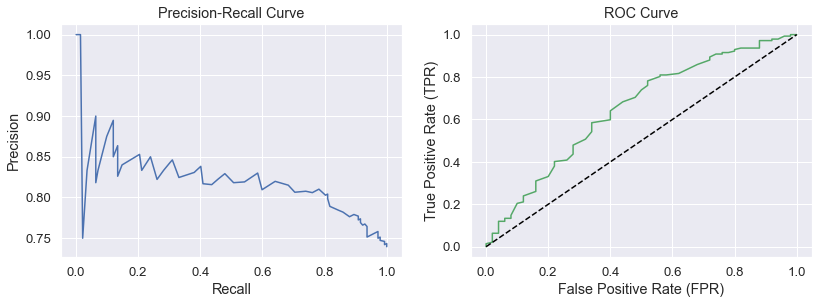

In [47]:
probas = model.predict_proba(X_test)
print_metrics(y_test, model.predict(X_test))
plot_curves(y_test, probas[:, 1])

<b>We have trained German Credit Risk Prediction model using Random Forest classifier, where we got 73.4% accuracy and 77.2% preccison which is good.</b>